## Turbidity and SPM modelled functions (FNU units)
See also [ipython notebook](http://localhost:8888/notebooks/%5BMethod%204%20Elina's%5D%20Turbidity%20and%20SPM%20validation-Validation_SPM_with_Matchups-using-reflectance_06.ipynb) \[Method 4 Elina's\] Turbidity and SPM validation-Validation\_SPM\_with\_Matchups-using-reflectance\_06).

In [1]:
import sys
import os.path
from sys import argv, exit
# Using the MathJax library to display the Latex.
from IPython.display import Math
#
import numpy as np
import pandas as pd
import os
os.chdir("/home/jobel/gits/jobel")

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib import artist
from matplotlib import rc, rcParams
rc('mathtext', default='regular')
rc('font', family='sans-serif') 
rc('font', serif='Arial') 
#rc('text', usetex='false') 
rcParams.update({'font.size': 24})
%matplotlib inline

In [3]:
import xray

In [4]:
bands =  xray.open_dataset("/media/jobel/SeagateDrive/diana_meris/sub_subset_MER_FRS_2PPDSI20100721_reprojected_UTMWGS84.nc")  #"/media/jobel/SeagateDrive/diana_meris/subset_MERIS_20100721_090501.nc")
bands.keys()

[u'reflec_1',
 u'reflec_2',
 u'reflec_3',
 u'reflec_4',
 u'reflec_5',
 u'reflec_6',
 u'reflec_7',
 u'reflec_8',
 u'reflec_9',
 u'reflec_10',
 u'reflec_12',
 u'reflec_13',
 u'reflec_14',
 u'water_vapour',
 u'algal_1',
 u'algal_2',
 u'yellow_subs',
 u'total_susp',
 u'photosyn_rad',
 u'toa_veg',
 u'boa_veg',
 u'rect_refl_red',
 u'rect_refl_nir',
 u'surf_press',
 u'aero_alpha',
 u'aero_opt_thick_443',
 u'aero_opt_thick_550',
 u'aero_opt_thick_865',
 u'cloud_albedo',
 u'cloud_opt_thick',
 u'cloud_top_press',
 u'cloud_type',
 u'l2_flags',
 u'turbidity620',
 u'SPM620_modelled',
 u'SPM_diff',
 u'latitude',
 u'longitude',
 u'dem_alt',
 u'dem_rough',
 u'lat_corr',
 u'lon_corr',
 u'sun_zenith',
 u'sun_azimuth',
 u'view_zenith',
 u'view_azimuth',
 u'zonal_wind',
 u'merid_wind',
 u'atm_press',
 u'ozone',
 u'rel_hum',
 u'lat',
 u'lon',
 u'x',
 u'y']

In [5]:
bands.coords

Coordinates:
    lat      (y, x) float32 56.1258 56.1259 56.126 56.1261 56.1262 56.1264 ...
    lon      (y, x) float32 18.1381 18.1431 18.148 18.153 18.158 18.163 ...
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...

In [ ]:
#TODO create a masked array of the reflec_06

In [6]:
@np.vectorize
def turbidity_620(rho_w_06):
    # According with Nechad et al 2009.    
    return ((174.41 *  rho_w_06) / (1-(rho_w_06 / 0.1533))) + 0.39

In [15]:
turbidity = turbidity_620(np.ma.masked_invalid(bands.reflec_6))

In [16]:
@np.vectorize
def calculate_spm_from_turbidity(turbidity):
    return 0.9218 * turbidity - 0.0422

In [17]:
spm_modelled = calculate_spm_from_turbidity(turbidity)
spm_modelled

masked_array(data =
 [[0.7750845990180969 0.793423660993576 0.796482698726654 ...,
  7.423588285255431 8.328174687194824 8.354038599586486]
 [0.8608966072678566 0.8762819583177566 0.7506741636037826 ...,
  8.127834638023376 8.880054192352295 9.467506357002259]
 [0.5991780066132545 0.5991780066132545 0.67469666826725 ...,
  11.28762216014862 18.264910316467283 10.976815662956238]
 ..., 
 [45.63249700241089 43.40480194778442 45.89441515808105 ...,
  9.346160204696655 9.340664969444274 9.340664969444274]
 [59.43561721191406 38.40091509857177 49.75186459655762 ...,
  8.567676748847962 9.14403119316101 9.14403119316101]
 [30.778113938140866 31.569339904785153 34.46834506454468 ...,
  12.163185175132751 9.887838668441773 9.14403119316101]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False

In [8]:
# Better colormap
import os
import pickle
dirname = "/home/jobel/Dropbox/Manuscripts_EOData2015/Manuscript_IV/colormap"
filename = "matplotlib_option_D.pickle"
with open(os.path.join(dirname,filename),"rb") as handle:
    cmap_D =  pickle.load(handle)
plt.register_cmap(cmap=cmap_D)

In [9]:
#This will center the map over open waters in front Curonian Lagoon
"""
Corners (lon, lat):
	 ( 17.55,  53.82)  ( 22.85,  53.85)
	 ( 17.27,  56.86)  ( 23.00,  56.90)
"""    
from mpl_toolkits.basemap import Basemap

lon_0=19.985708
lat_0=55.472336
llcrnrlon=17.55
llcrnrlat= 53.82
urcrnrlon=23.0
urcrnrlat=56.90

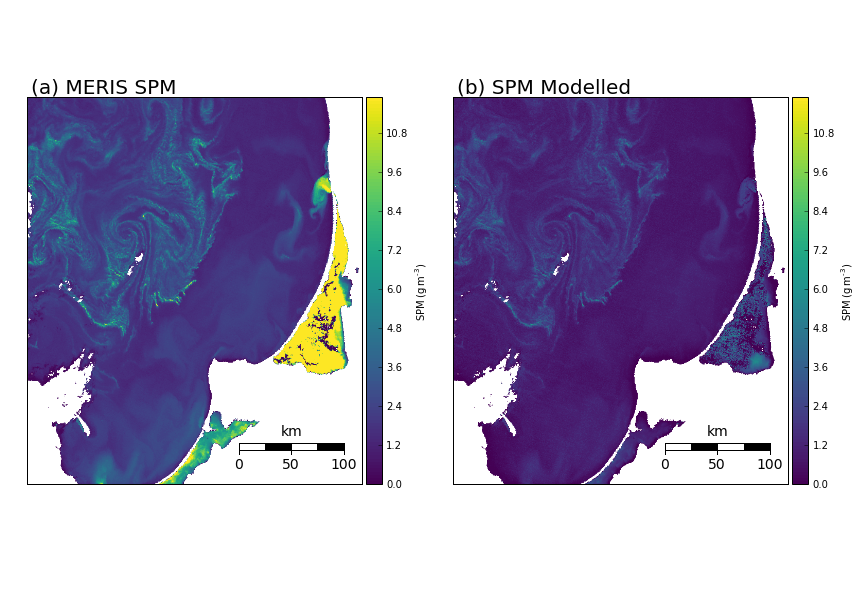

In [22]:
# ## Used for dual l2p plotting
date_string = "20100721"# 
#########################
my_dpi = 600 #(3719, 2519)
fig = plt.figure(figsize=(14,10), dpi=300)  #figsize=(1008/my_dpi, 1450/my_dpi), dpi=my_dpi)
ax = plt.gca()
ax.axis('off')
fig.patch.set_facecolor('white')
#plt.suptitle("MEGS DATE: " + date_string[:4] + "-" + date_string[4:6] + "-" + date_string[6:8])
ax1 = fig.add_subplot(1, 2, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
#
#
data = turbidity # bands["total_susp"]
data = np.fliplr(np.rot90(data,2))
#masked = np.ma.masked_invalid(data)
im_spm = plt.imshow(data)
################################
m = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax1 )
m.drawmapscale(ax=ax1,lon=21.4, lat=54,
               lon0=lon_0, lat0=lat_0, length=100, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='black')
#############
#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 11 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)
# Setting the masked values to white
cmap.set_bad("w",1.0)
im_spm.set_cmap(cmap)
im_spm.set_norm(norm)
################################################################
m.imshow(data, cmap = cmap, norm=norm)
################################################################
ax1.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 12) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
ax1.text(0.01, 1.01, "(a) MERIS SPM",
        horizontalalignment='left',
        fontsize=20,
        transform = ax1.transAxes, color = "black")

#cbar.remove()
##################################################################################################
ax2 = fig.add_subplot(1, 2, 2)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
#
#
data = bands['SPM620_modelled']
data = np.fliplr(np.rot90(data,2))
#masked = np.ma.masked_invalid(data)
im_spm2 = plt.imshow(data)
################################
m2 = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax2 )
m2.drawmapscale(ax=ax2,lon=21.4, lat=54,
               lon0=lon_0, lat0=lat_0, length=100, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='black')
#############
#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 11 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)
# Setting the masked values to white
cmap.set_bad("w",1.0)
im_spm2.set_cmap(cmap)
im_spm2.set_norm(norm)
################################################################
m2.imshow(data, cmap = cmap, norm=norm)
################################################################
ax2.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm2, cax = cax)  #use_gridspec=True
im_spm2.set_clim(0, 12) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
ax2.text(0.01, 1.01, "(b) SPM Modelled",
        horizontalalignment='left',
        fontsize=20,
        transform = ax2.transAxes, color = "black")

#cbar.remove()
##################################################################################################

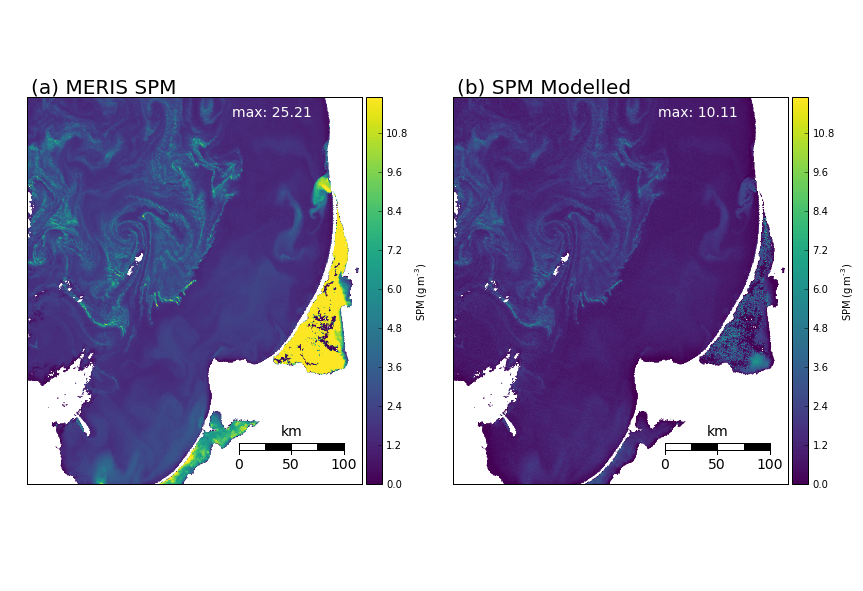

In [36]:
# ## Used for dual l2p plotting
date_string = "20100721"# 
#########################
my_dpi = 600 #(3719, 2519)
fig = plt.figure(figsize=(14,10), dpi=300)  #figsize=(1008/my_dpi, 1450/my_dpi), dpi=my_dpi)
ax = plt.gca()
ax.axis('off')
fig.patch.set_facecolor('white')
#plt.suptitle("MEGS DATE: " + date_string[:4] + "-" + date_string[4:6] + "-" + date_string[6:8])
ax1 = fig.add_subplot(1, 2, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
#
#
data = bands["total_susp"]
data = np.fliplr(np.rot90(data,2))
data = np.ma.masked_invalid(data)
im_spm = plt.imshow(data)
################################
m = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax1 )
m.drawmapscale(ax=ax1,lon=21.4, lat=54,
               lon0=lon_0, lat0=lat_0, length=100, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='black')
#############
#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 11 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)
# Setting the masked values to white
cmap.set_bad("w",1.0)
im_spm.set_cmap(cmap)
im_spm.set_norm(norm)
################################################################
m.imshow(data, cmap = cmap, norm=norm)
################################################################
ax1.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 12) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
ax1.text(0.01, 1.01, "(a) MERIS SPM",
        horizontalalignment='left',
        fontsize=20,
        transform = ax1.transAxes, color = "black")

ax1.text(0.85, 0.95,  "max: "+"%.2f"% np.ma.max(data),
        horizontalalignment='right',
        fontsize=14,
        transform = ax1.transAxes, color = "white")

#cbar.remove()
##################################################################################################
ax2 = fig.add_subplot(1, 2, 2)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
#
#
data = bands['turbidity620']
data = np.fliplr(np.rot90(data,2))
data = np.ma.masked_invalid(data)
im_spm2 = plt.imshow(data)
################################
m2 = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax2 )
m2.drawmapscale(ax=ax2,lon=21.4, lat=54,
               lon0=lon_0, lat0=lat_0, length=100, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='black')
#############
#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 11 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)
# Setting the masked values to white
cmap.set_bad("w",1.0)
im_spm2.set_cmap(cmap)
im_spm2.set_norm(norm)
################################################################
m2.imshow(data, cmap = cmap, norm=norm)
################################################################
ax2.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm2, cax = cax)  #use_gridspec=True
im_spm2.set_clim(0, 12) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
ax2.text(0.01, 1.01, "(b) SPM Modelled",
        horizontalalignment='left',
        fontsize=20,
        transform = ax2.transAxes, color = "black")

ax2.text(0.85, 0.95, "max: "+"%.2f"% np.ma.max(data),
        horizontalalignment='right',
        fontsize=14,
        transform = ax2.transAxes, color = "white")

#cbar.remove()
##################################################################################################

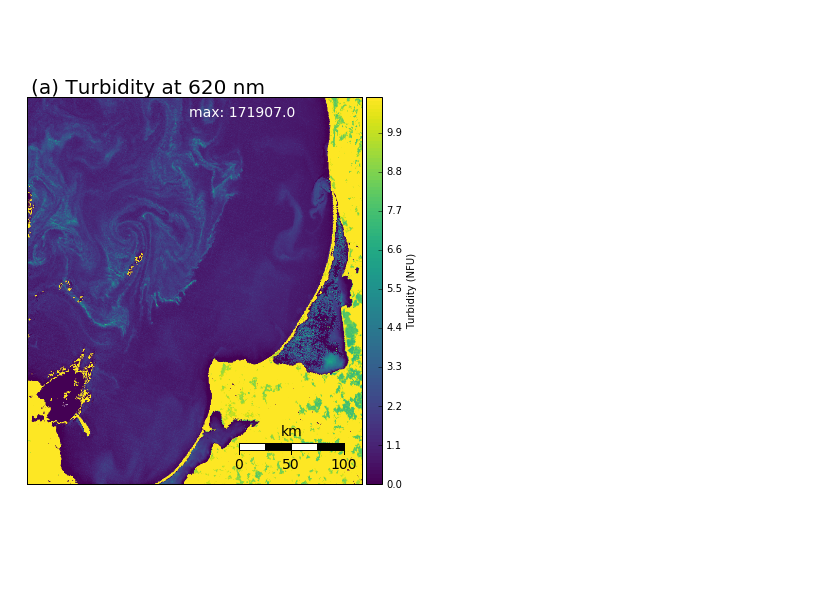

In [27]:
# ## Used for dual l2p plotting
date_string = "20100721"# 
#########################
my_dpi = 600 #(3719, 2519)
fig = plt.figure(figsize=(14,10), dpi=300)  #figsize=(1008/my_dpi, 1450/my_dpi), dpi=my_dpi)
ax = plt.gca()
ax.axis('off')
fig.patch.set_facecolor('white')
#plt.suptitle("MEGS DATE: " + date_string[:4] + "-" + date_string[4:6] + "-" + date_string[6:8])
ax1 = fig.add_subplot(1, 2, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
#
#
data = turbidity
data = np.fliplr(np.rot90(data,2))
#masked = np.ma.masked_invalid(data)
im_spm = plt.imshow(data)
################################
m = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax1 )
m.drawmapscale(ax=ax1,lon=21.4, lat=54,
               lon0=lon_0, lat0=lat_0, length=100, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='black')
#############
#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 10 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)
# Setting the masked values to white
cmap.set_bad("w",1.0)
im_spm.set_cmap(cmap)
im_spm.set_norm(norm)
################################################################
m.imshow(data, cmap = cmap, norm=norm)
################################################################
ax1.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 11) # (0,14)
cbar.set_label("Turbidity (NFU)")
ax1.text(0.01, 1.01, "(a) Turbidity at 620 nm",
        horizontalalignment='left',
        fontsize=20,
        transform = ax1.transAxes, color = "black")
ax1.text(0.8, 0.95, "max: "+str(data.max()),
        horizontalalignment='right',
        fontsize=14,
        transform = ax1.transAxes, color = "white")
